In [1]:
import tensorflow as tf

import iris_data

import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import ipywidgets as widgets

Check Version Numbers:

In [2]:
print("TensorFlow version: {}".format(tf.VERSION))

TensorFlow version: 1.7.0


In [11]:
MODEL_DIR = './.output'

***
## Get Datasets

In [4]:
# Fetch the data
(train_x, train_y), (test_x, test_y) = iris_data.load_data()

# Feature columns describe how to use the input.
featureColumns = []
for key in train_x.keys():
    featureColumns.append(tf.feature_column.numeric_column(key=key))

## Visualize Datasets

In [5]:
import math
className = train_y.name
features = train_x.columns.tolist()
allX = pd.concat([train_x, test_x])
allY = pd.concat([train_y, test_y])
df = pd.concat([allX, allY], axis=1)

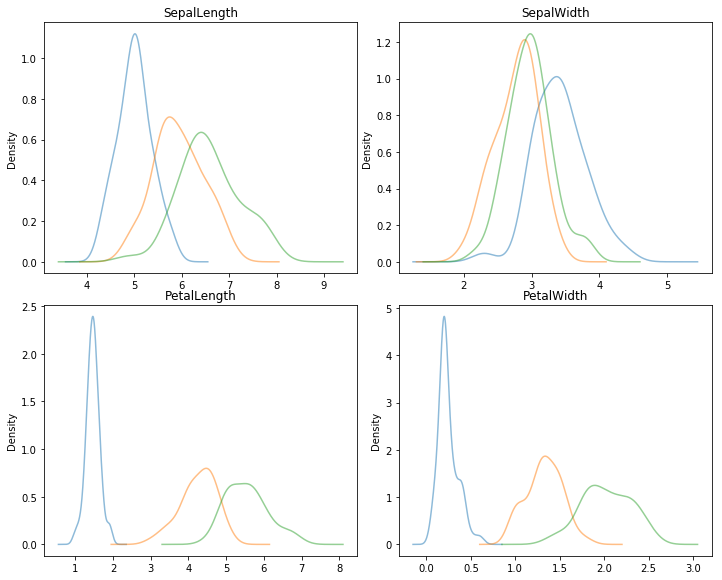

In [6]:
nCols = 2
nRows = int(math.ceil(len(features) / nCols))
fig, axs = plt.subplots(ncols=nCols, nrows=nRows, figsize=(10, 8));
plt.tight_layout()

for i, feature in enumerate(features):
    df.groupby(className)[feature].plot.kde(ax=axs[int(i / nCols), i % nCols],
                                        alpha=0.5,
                                        title=feature);

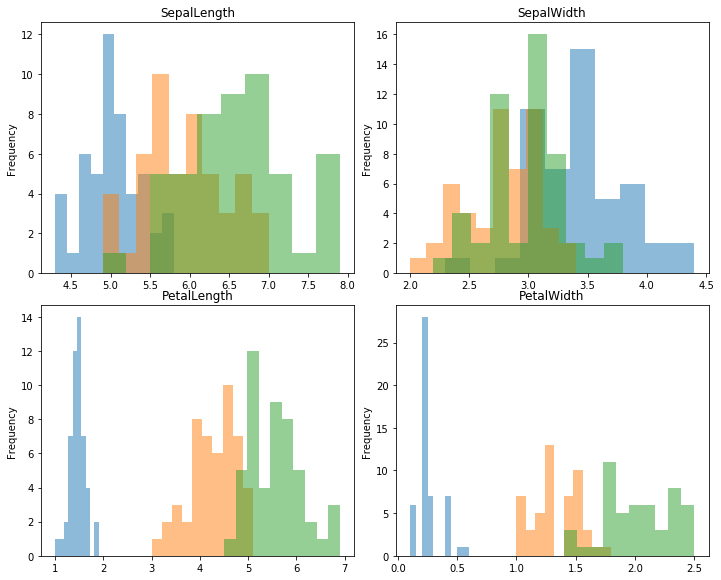

In [7]:
nCols = 2
nRows = int(math.ceil(len(features) / nCols))
fig, axs = plt.subplots(ncols=nCols, nrows=nRows, figsize=(10, 8));
plt.tight_layout()

for i, feature in enumerate(features):
    df.groupby(className)[feature].plot.hist(ax=axs[int(i / nCols), i % nCols],
                                        alpha=0.5,
                                        title=feature);

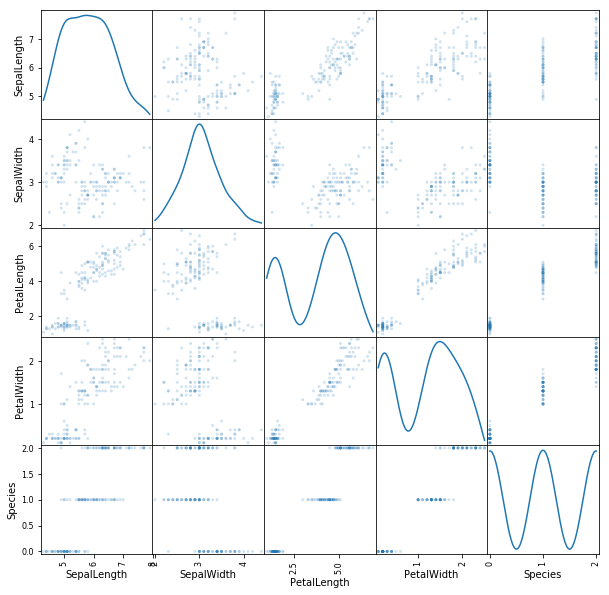

In [8]:
scatter_matrix(df, alpha=0.2, figsize=(10,10), diagonal="kde");

NOTE: This scatter plot matrix is left in for sake of completeness.

***
## Building a Model
In this section we will build a DNN for classifying the Iris training dataset.

In [9]:
def trainModel(batchSize, trainSteps):
    # Build 2 hidden layer DNN with 10, 10 units respectively.
    classifier = tf.estimator.DNNClassifier(
        feature_columns=featureColumns,
        # Two hidden layers of 10 nodes each.
        hidden_units=[10, 10],
        # The model must choose between 3 classes.
        n_classes=3,
        model_dir=MODEL_DIR);

    # Train the Model.
    classifier.train(
        input_fn=lambda:iris_data.train_input_fn(train_x, train_y, batchSize),
        steps=trainSteps);
    
    return classifier


# Evaluate the model.
def evaluateModel(classifier, batchSize):
    eval_result = classifier.evaluate(
        input_fn=lambda:iris_data.eval_input_fn(test_x, test_y, batchSize))

    print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))
    
    return eval_result

def generatePredictions(classifier, batchSize):
    # Generate predictions from the model
    expected = ['Setosa', 'Versicolor', 'Virginica']
    predict_x = {
        'SepalLength': [5.1, 5.9, 6.9],
        'SepalWidth': [3.3, 3.0, 3.1],
        'PetalLength': [1.7, 4.2, 5.4],
        'PetalWidth': [0.5, 1.5, 2.1],
    }

    predictions = classifier.predict(
        input_fn=lambda:iris_data.eval_input_fn(predict_x,
                                                labels=None,
                                                batch_size=batchSize))

    template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

    for pred_dict, expec in zip(predictions, expected):
        class_id = pred_dict['class_ids'][0]
        probability = pred_dict['probabilities'][class_id]

        print(template.format(iris_data.SPECIES[class_id],
                              100 * probability, expec))
        
def trainAndEvaluate(b):
    tf.logging.set_verbosity(tf.logging.WARN)
    print("Training...")
    classifier = trainModel(batchSizeWidget.value, trainStepWidget.value)
    print("Evaluating...")
    evalResults = evaluateModel(classifier, batchSizeWidget.value)
    
    generatePredictions(classifier, batchSizeWidget.value)
    
    display(evalResults)

In [10]:
batchSizeWidget = widgets.IntSlider(value=100,
                  min=1,
                  max=1000,
                  description='Batch Size')

trainStepWidget = widgets.IntSlider(value=1000,
                  min=1,
                  max=10000,
                  description='Training Steps')

trainButton = widgets.Button(description='Train Model!')
trainButton.on_click(trainAndEvaluate)

display(batchSizeWidget)
display(trainStepWidget)
display(trainButton)


IntSlider(value=100, description='Batch Size', max=1000, min=1)

IntSlider(value=1000, description='Training Steps', max=10000, min=1)

Button(description='Train Model!', style=ButtonStyle())

Training...
Evaluating...

Test set accuracy: 0.967


Prediction is "Setosa" (100.0%), expected "Setosa"

Prediction is "Versicolor" (100.0%), expected "Versicolor"

Prediction is "Virginica" (100.0%), expected "Virginica"


{'accuracy': 0.96666664,
 'average_loss': 0.18350686,
 'global_step': 38173,
 'loss': 5.5052056}